In [1]:
import pandas as pd

In [3]:
df_train = pd.read_csv('/home/seungsu/workspace/ML/data/mnist_train.csv')
df_test = pd.read_csv('/home/seungsu/workspace/ML/data/mnist_test.csv')

In [4]:
df_train.shape , df_test.shape

((60000, 785), (10000, 785))

In [5]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import numpy as np 
X_train = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train['label'])

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test['label'])

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [8]:
import random

samples = random.choices(population = range(0,60000), k=16)
samples

[40286,
 36625,
 52258,
 40471,
 53294,
 9571,
 5193,
 14846,
 19931,
 51032,
 51117,
 3435,
 58251,
 51107,
 25085,
 34018]

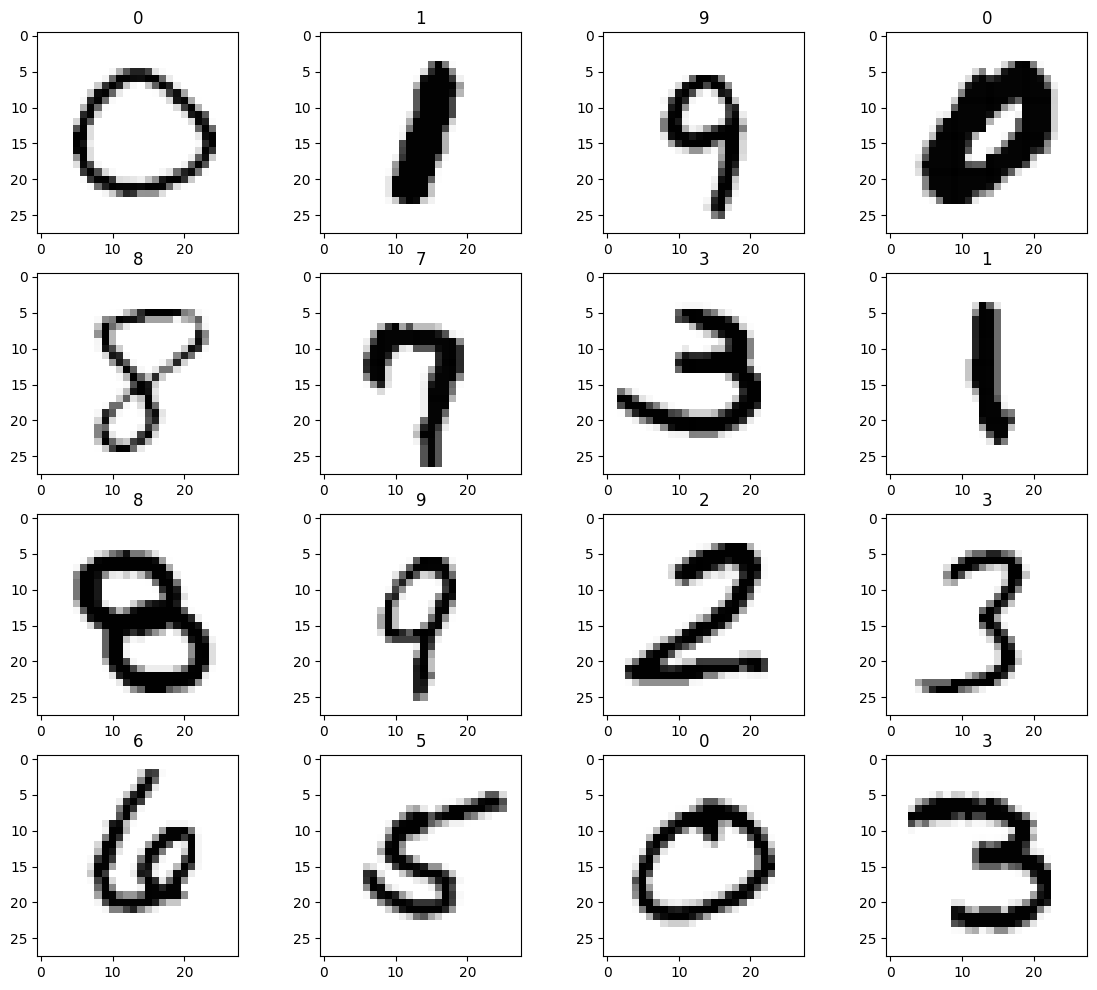

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap = 'Greys', interpolation ='nearest')
    plt.title(y_train[n])
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()
clf = KNeighborsClassifier(n_neighbors =5)
clf.fit(X_train, y_train)
print('fit time :' , time.time() - start_time)

fit time : 0.19110321998596191


In [11]:
from sklearn.metrics import accuracy_score

start_time = time.time()
pred = clf.predict(X_test)
print('fit time :', time.time() - start_time)
print(accuracy_score(y_test, pred))

fit time : 17.41017460823059
0.9688


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV , StratifiedKFold

In [13]:
pipe = Pipeline([
    ('pca' , PCA()),
    ('clf', KNeighborsClassifier())
])

parameters = {
    'pca__n_components' : [2,5,10],
    'clf__n_neighbors' : [5,10,15]
}

kf = StratifiedKFold(n_splits=5, shuffle =True, random_state= 13)
grid = GridSearchCV(pipe, parameters, cv = kf, n_jobs= -1 , verbose = 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 15],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [14]:
print('best score : %0.3f' %grid.best_score_)
print('best parameters set:')
best_parameters = grid.best_estimator_.get_params()


best score : 0.931
best parameters set:


In [16]:
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' %(param_name, best_parameters[param_name]))

	clf__n_neighbors: 10
	pca__n_components: 10


In [19]:
def results(y_pred, y_test):
    from sklearn.metrics import classification_report, confusion_matrix
    print(classification_report(y_test, y_pred))
    
results(grid.predict(X_train), y_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5923
           1       0.98      0.99      0.98      6742
           2       0.96      0.96      0.96      5958
           3       0.94      0.90      0.92      6131
           4       0.94      0.93      0.93      5842
           5       0.93      0.94      0.93      5421
           6       0.96      0.98      0.97      5918
           7       0.96      0.95      0.96      6265
           8       0.92      0.91      0.91      5851
           9       0.90      0.91      0.90      5949

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



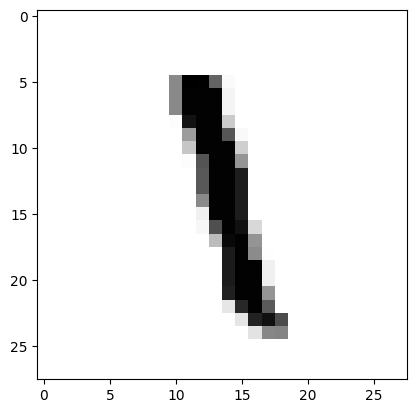

In [21]:
n = 700
plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation = 'nearest')
plt.show()

In [22]:
preds = grid.best_estimator_.predict(X_test)
preds


array([7, 2, 1, ..., 4, 5, 6])

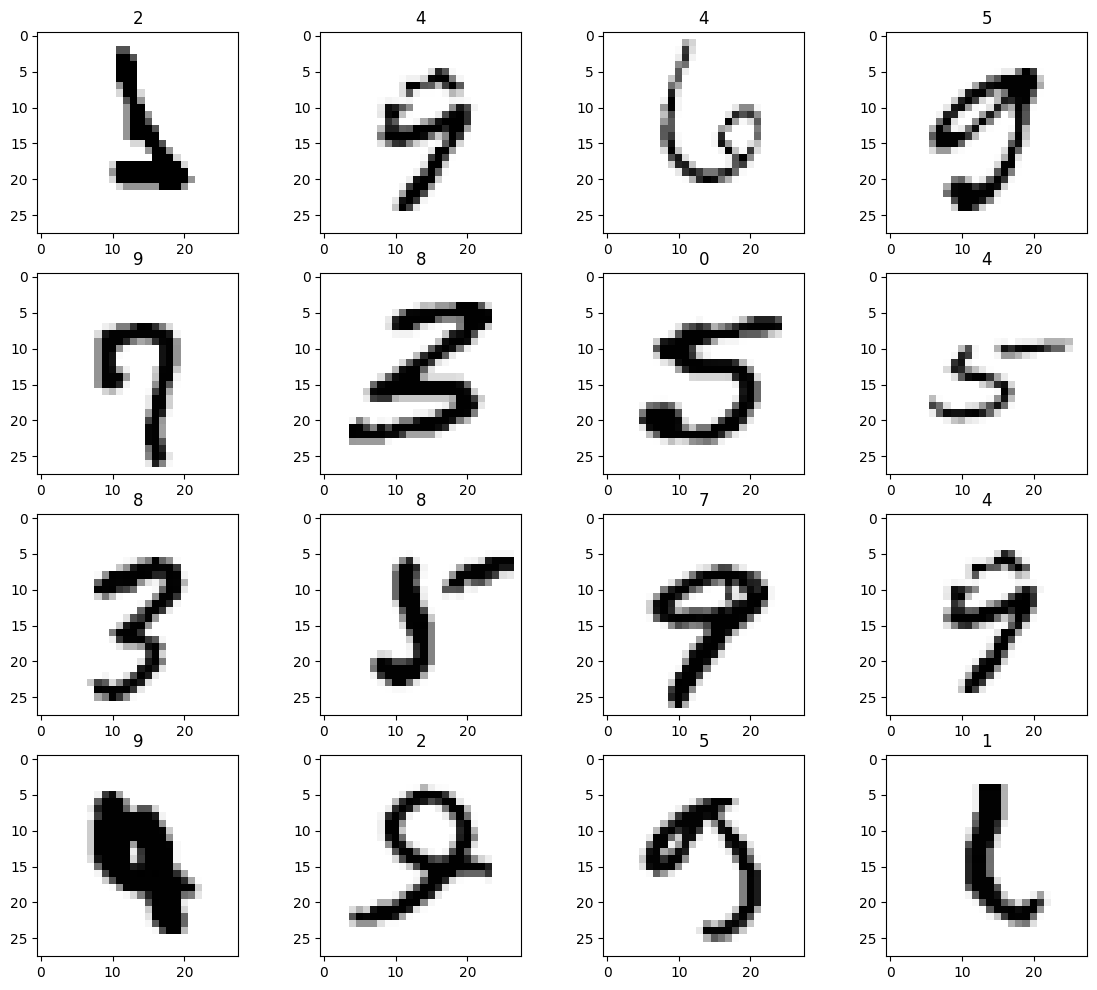

In [25]:
wrong_results = X_test[y_test != preds]
samples = random.choices(population = range(0, wrong_results.shape[0]), k =16)

plt.figure(figsize = (14,12))

for idx , n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(wrong_results[n].reshape(28,28), cmap = 'Greys',
               interpolation = 'nearest')
    plt.title(grid.best_estimator_.predict(wrong_results[n].reshape(1,784))[0])
plt.show()